# TP Fuzzy C-means

In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [41]:
def calculate_vector_center(X, U, m):
    um = U ** m
    numerator = um.T @ X 
    denominator = np.sum(um, axis=0).reshape(-1, 1)  
    denominator = np.where(denominator == 0, 1e-10, denominator)
    centers = numerator / denominator
    return centers


In [42]:
def update_matrix(X, centers, m, eps=1e-8):

    N = X.shape[0]
    K = centers.shape[0]

    
    X_norm = np.sum(X**2, axis=1).reshape(N, 1)
    C_norm = np.sum(centers**2, axis=1).reshape(1, K)
    dist_sq = X_norm + C_norm - 2 * (X @ centers.T)
    dist_sq = np.maximum(dist_sq, 0)

    dist = np.sqrt(dist_sq) + eps

    power = 2.0 / (m - 1.0)

    dist_power = dist ** power  
    inv_dist_power = 1.0 / dist_power  
    sum_inv = np.sum(inv_dist_power, axis=1, keepdims=True)  
    U_new = inv_dist_power / sum_inv
    return U_new

In [43]:
def fuzzy_c_means(X, K=2, m=2.0, error=1e-5, max_iter=200, random_state=23):

    N = X.shape[0]
    rng = np.random.default_rng(random_state)
    U = rng.random((N, K))
    U = U / np.sum(U, axis=1, keepdims=True)

    for iteration in range(1, max_iter + 1):
        centers = calculate_vector_center(X, U, m)
        U_new = update_matrix(X, centers, m)
        diff = np.linalg.norm(U_new - U)  
        print(f"Iter {iteration}: ||U_new - U|| = {diff:.6e}")  
        if diff < error:
            print(f"Convergence atteinte à l'itération {iteration}")
            break
        U = U_new

    centers = calculate_vector_center(X, U, m)
    return centers, U
    

In [44]:
def flatten_image(image):
    
    arr = np.array(image)

    if arr.ndim == 2:  
        X = arr.reshape(-1, 1).astype(np.float64)
    elif arr.ndim == 3:  
        X = arr.reshape(-1, arr.shape[2]).astype(np.float64)
    else:
        raise ValueError("Format d'image non supporté.")
    return X

def segment_image_from_U(U, image_shape):
    labels = np.argmax(U, axis=1)
    H, W = image_shape[0], image_shape[1]
    return labels.reshape(H, W)

def plot_results(image, centers, U, labels, cmap='viridis'):
    img_arr = np.array(image)

    K = U.shape[1]
    H = img_arr.shape[0]
    W = img_arr.shape[1]

    plt.figure(figsize=(4 + 3*K, 5))
    plt.subplot(2, K+1, 1)

    if img_arr.ndim == 2:
        plt.imshow(img_arr, cmap='gray')
    else:
        plt.imshow(img_arr.astype(np.uint8))
    plt.title("Originale")
    plt.axis('off')

    plt.subplot(2, K+1, 2)
    plt.imshow(labels, cmap='tab20')
    plt.title("Segmentation")
    plt.axis('off')

    for j in range(K):
        plt.subplot(2, K+1, K+2 + j)
        plt.imshow(U[:, j].reshape(H, W), cmap=cmap)
        plt.title(f"U (cluster {j})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Iter 1: ||U_new - U|| = 3.452640e+02
Iter 2: ||U_new - U|| = 1.078134e+01
Iter 3: ||U_new - U|| = 3.757091e+01
Iter 4: ||U_new - U|| = 1.112952e+02
Iter 5: ||U_new - U|| = 2.365497e+02
Iter 6: ||U_new - U|| = 2.814172e+02
Iter 7: ||U_new - U|| = 1.222622e+02
Iter 8: ||U_new - U|| = 4.351560e+01
Iter 9: ||U_new - U|| = 2.083031e+01
Iter 10: ||U_new - U|| = 1.032044e+01
Iter 11: ||U_new - U|| = 5.109436e+00
Iter 12: ||U_new - U|| = 2.530952e+00
Iter 13: ||U_new - U|| = 1.254785e+00
Iter 14: ||U_new - U|| = 6.224611e-01
Iter 15: ||U_new - U|| = 3.088876e-01
Iter 16: ||U_new - U|| = 1.533080e-01
Iter 17: ||U_new - U|| = 7.609711e-02
Iter 18: ||U_new - U|| = 3.777382e-02
Iter 19: ||U_new - U|| = 1.875096e-02
Iter 20: ||U_new - U|| = 9.308098e-03
Iter 21: ||U_new - U|| = 4.620624e-03
Iter 22: ||U_new - U|| = 2.293727e-03
Iter 23: ||U_new - U|| = 1.138631e-03
Iter 24: ||U_new - U|| = 5.652289e-04
Iter 25: ||U_new - U|| = 2.805862e-04
Iter 26: ||U_new - U|| = 1.392866e-04
Iter 27: ||U_new - U|

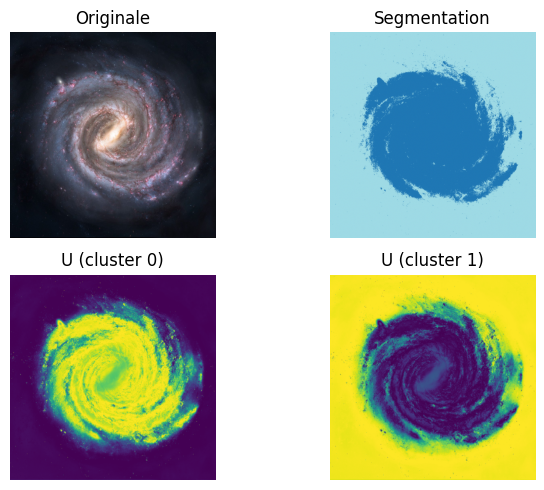

In [45]:
if __name__ == "__main__":
    img_path = "./milky-way.jpg"  
    img = Image.open(img_path)


    X = flatten_image(img)  
    K = 2
    m = 2.0
    centers, U = fuzzy_c_means(X, K=K, m=m, error=1e-5, max_iter=100, random_state=42)
    labels = segment_image_from_U(U, img.size[::-1] if isinstance(img, Image.Image) else (img.shape[0], img.shape[1]))
    plot_results(img, centers, U, labels)